<a href="https://colab.research.google.com/github/Shrutichauha7/McDonalds-case-study/blob/main/McDonalds_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
mcdonalds = pd.read_csv("/McDonalds Case Study-20250326T083132Z-001.zip")

In [ ]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
print(mcdonalds.shape)

(1453, 15)


In [ ]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

In [ ]:
col_means = MD_x.mean().round(2)

In [ ]:
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Explained variance and cumulative proportion
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


In [ ]:
print("Importance of components:")
print("PC  Std Dev  Prop. of Var  Cumulative Prop.")
for i, (std_dev, prop_var, cum_var) in enumerate(zip(np.sqrt(pca.explained_variance_), explained_variance, cumulative_variance), start=1):
    print(f"PC{i}: {std_dev:.4f}  {prop_var:.4f}  {cum_var:.4f}")

Importance of components:
PC  Std Dev  Prop. of Var  Cumulative Prop.
PC1: 0.7570  0.2994  0.2994
PC2: 0.6075  0.1928  0.4922
PC3: 0.5046  0.1330  0.6253
PC4: 0.3988  0.0831  0.7084
PC5: 0.3374  0.0595  0.7679
PC6: 0.3103  0.0503  0.8182
PC7: 0.2897  0.0438  0.8620
PC8: 0.2751  0.0395  0.9016
PC9: 0.2653  0.0368  0.9383
PC10: 0.2488  0.0324  0.9707
PC11: 0.2369  0.0293  1.0000


In [ ]:
print(MD_pca.round(1))

[[-0.4  0.2 -0.7 ... -0.2 -0.5  0.6]
 [ 0.2 -0.4  0.7 ... -0.1 -0.5  0.5]
 [-0.4 -0.7  0.1 ...  0.3 -0.1 -0.2]
 ...
 [ 0.2 -1.1 -0.2 ... -0.  -0.1  0. ]
 [ 1.2  0.  -0.6 ... -0.   0.   0.1]
 [-1.6 -0.3  0.  ...  0.1  0.4  0.5]]


Text(0.5, 1.0, 'PCA Projection')

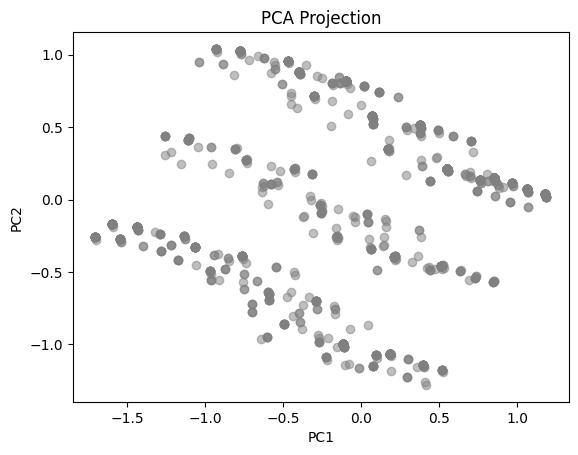

In [ ]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5) # Changed MD_pca_transformed to MD_pca
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")

In [1]:
def plot_pca_axes(pca, feature_names, ax):
    components = pca.components_
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, components[0, i], components[1, i], color='red', alpha=0.7)
        plt.text(components[0, i], components[1, i], feature, color='red', fontsize=12)

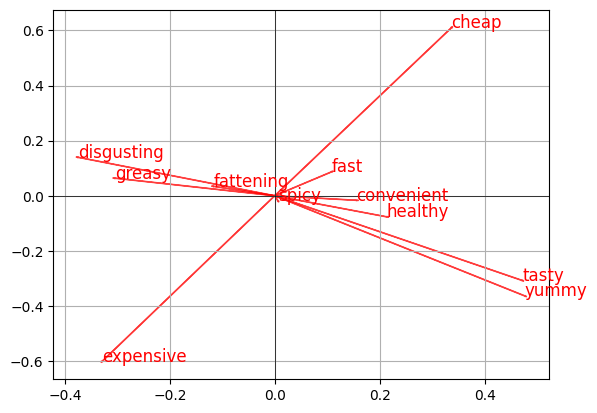

In [ ]:
plot_pca_axes(pca, MD_x, plt)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.show()

In [ ]:
np.random.seed(1234)

In [ ]:
kmeans_models = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)}

In [ ]:
best_k = 2  # Change this based on evaluation
best_kmeans = kmeans_models[best_k]

In [ ]:
MD_clusters = best_kmeans.labels_

In [ ]:
inertia_values = [model.inertia_ for model in kmeans_models.values()]

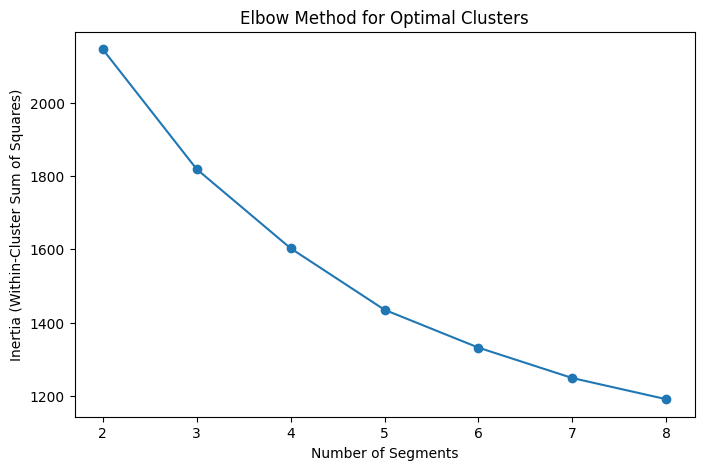

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()